In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import gridspec

In [23]:
data=pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [24]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlierfraction=len(fraud)/float(len(valid))
print(outlierfraction)
print(len(fraud))
print(len(valid))

0.0017304750013189597
492
284315


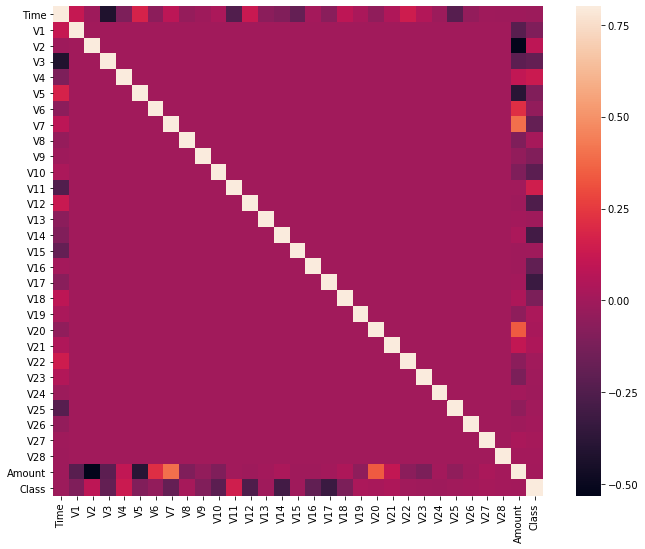

In [25]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [26]:
data=data.dropna()
x = data.drop(['Class'], axis = 1) 
y = data["Class"] 
print(x.shape) 
print(y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xdata = x.values 
ydata = y.values 

(284807, 30)
(284807,)


In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.2,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(xtrain, ytrain) 
# predictions 
ypred = rfc.predict(xtest)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix 

In [31]:
n_outliers=len(fraud)
n_errors=(ypred!=ytest).sum()
acc=accuracy_score(ytest,ypred)
print(acc)
prec=precision_score(ytest,ypred)
print(prec)
rec=recall_score(ytest,ypred)
print(rec)


0.9995259997893332
0.9493670886075949
0.7653061224489796


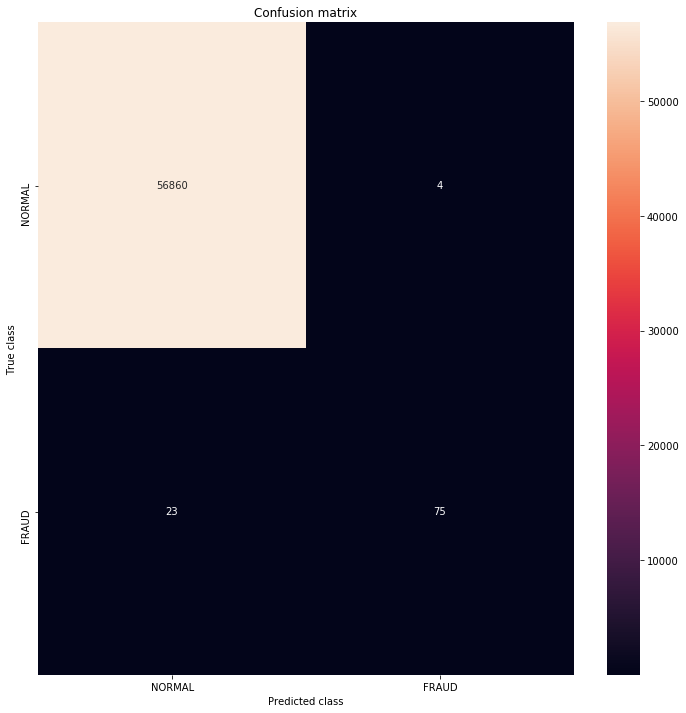

In [33]:
LABELS=['NORMAL','FRAUD']
conf_matrix=confusion_matrix(ytest,ypred)
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 